In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
path = "State Projections by Race 2017 to 2062 Final - Georgia.csv"

# Read in Arizona census data
georgia = pd.read_csv(path)


# Display the data table for preview
georgia.head()

,Year,Total,nh_white,nh_black,hispanic,nh_other
0,2017,10429379,5507334,3267577,1005959,648509
1,2018,10517912,5513610,3310604,1026838,666860
2,2019,10606453,5519904,3353707,1047633,685209
3,2020,10694980,5526117,3396756,1068579,703528
4,2021,10783482,5532444,3439808,1089357,721873


In [2]:
# Read in voter data and display
# 2016 voter breakdown by political party. Based on CNN exit polls

voter_path = "voter_breakdown_2016 - georgia.csv"

race_voter = pd.read_csv(voter_path)
race_voter = race_voter.groupby(['race']).sum()
race_voter

,clinton,trump
race,,
asian,65,27
black,89,9
latino,67,27
white,21,75


In [3]:
from turnout import turnout_allgender
turnout_allgender

,voting_rate
race,
nh_white,64.1
black,55.9
hispanic,32.5
asian,33.9


In [4]:
# Clean data for plotting racial data over time
# No breakdown by age or gender

total_pop = georgia['Total']
years = georgia['Year']

demographic_data = georgia.set_index('Year')
demographic_data = demographic_data[['nh_white','nh_black','hispanic','nh_other']]

demographic_data.head()

,nh_white,nh_black,hispanic,nh_other
Year,,,,
2017,5507334,3267577,1005959,648509
2018,5513610,3310604,1026838,666860
2019,5519904,3353707,1047633,685209
2020,5526117,3396756,1068579,703528
2021,5532444,3439808,1089357,721873


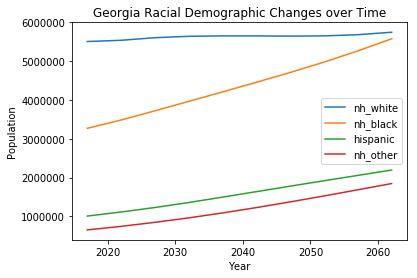

In [5]:
# Plot race over time
demographic_data.plot(title = 'Georgia Racial Demographic Changes over Time')
plt.ylabel('Population')
plt.show()



In [6]:
rep_breakdown = race_voter['trump'] / 100
rate = turnout_allgender['voting_rate'] / 100

rep_white = demographic_data['nh_white'] * rate[0] * rep_breakdown[3]
rep_black = demographic_data['nh_black'] * rate[1] * rep_breakdown[1]
rep_hispanic = demographic_data['hispanic'] * rate[2] * rep_breakdown[2]
rep_asian = demographic_data['nh_other'] * rate[3] * rep_breakdown[0]

rep_total = rep_white + rep_black + rep_hispanic + rep_asian

rep_forecast_df = pd.DataFrame({
    'White': rep_white,
    'Black': rep_black,
    'Hispanic': rep_hispanic,
    'Asian': rep_asian
   }, index=years)

rep_forecast_df.head()


,White,Black,Hispanic,Asian
Year,,,,
2017,2.647651e+06,164391.79887,88272.90225,59358.02877
2018,2.650668e+06,166556.48724,90105.03450,61037.69580
2019,2.653694e+06,168724.99917,91929.79575,62717.17977
2020,2.656681e+06,170890.79436,93767.80725,64393.91784
2021,2.659722e+06,173056.74048,95591.07675,66073.03569


In [7]:
dem_breakdown = race_voter['clinton'] / 100
rate = turnout_allgender['voting_rate'] / 100

dem_white = demographic_data['nh_white'] * rate[0] * dem_breakdown[3]
dem_black = demographic_data['nh_black'] * rate[1] * dem_breakdown[1]
dem_hispanic = demographic_data['hispanic'] * rate[2] * dem_breakdown[2]
dem_asian = demographic_data['nh_other'] * rate[3] * dem_breakdown[0]

dem_total = dem_white + dem_black + dem_hispanic + dem_asian

dem_forecast_df = pd.DataFrame({
    'White': dem_white,
    'Black': dem_black,
    'Hispanic': dem_hispanic,
    'Asian': dem_asian
   }, index=years)

dem_forecast_df.head()


,White,Black,Hispanic,Asian
Year,,,,
2017,741342.22974,1.625652e+06,219047.57225,142898.95815
2018,742187.04210,1.647059e+06,223593.97450,146942.60100
2019,743034.27744,1.668503e+06,228122.08575,150985.80315
2020,743870.60937,1.689920e+06,232683.07725,155022.39480
2021,744722.28684,1.711339e+06,237207.48675,159064.71555


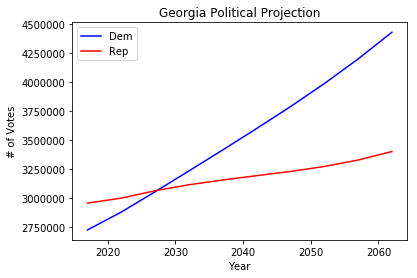

In [8]:
forecast_df = pd.DataFrame({
   'Dem': dem_total,
   'Rep': rep_total
   }, index=years)

forecast_df.head()

plt.plot(years,dem_total, label = "Dem", color = 'b')
plt.plot(years,rep_total, label = "Rep", color = 'r')
plt.ylabel('# of Votes')
plt.xlabel('Year')
plt.title('Georgia Political Projection')
plt.legend(loc='best')
plt.show()

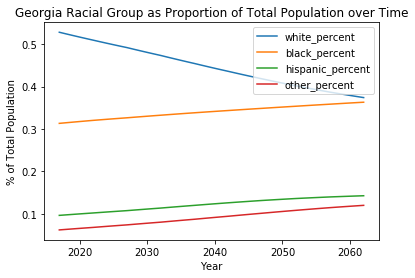

In [10]:
percent_path = "State Projections by Race 2017 to 2062 Final - ga_percent.csv"
georgia_percent = pd.read_csv(percent_path)

georgia_percent = georgia_percent.set_index('Year')
georgia_percent = georgia_percent[['white_percent','black_percent','hispanic_percent','other_percent']]
georgia_percent.head()


georgia_percent.plot(title = 'Georgia Racial Group as Proportion of Total Population over Time')
plt.ylabel('% of Total Population')
plt.show()

